Note: you may need to restart the kernel to use updated packages.
Training the SOM...
Visualizing the SOM...


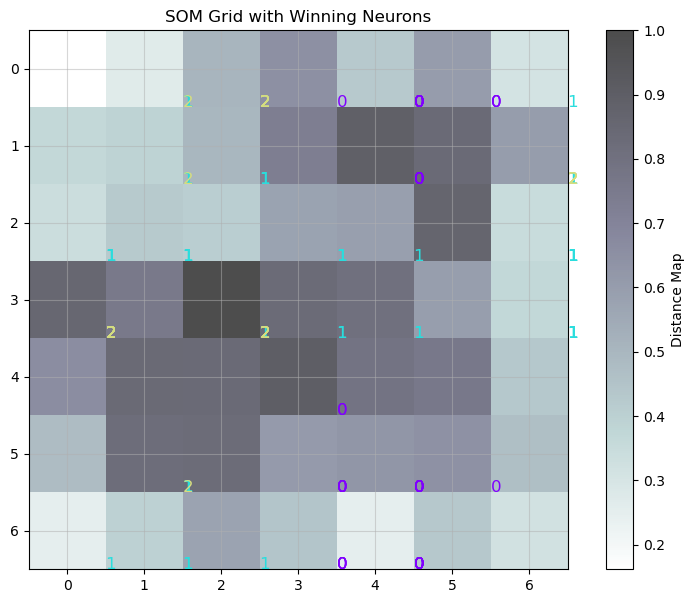

Quantization Error: 0.1232
U-Matrix (Distance Map):
[[0.16160006 0.36724786 0.34055062 0.85742593 0.66314806 0.47723392
  0.24765017]
 [0.26658294 0.3881296  0.4241042  0.75897327 0.84055332 0.82565578
  0.39460886]
 [0.50665209 0.49955221 0.40924397 1.         0.8384508  0.83232691
  0.57618556]
 [0.65180961 0.73193473 0.57893542 0.83378377 0.90802515 0.61086155
  0.44466383]
 [0.42958605 0.89414793 0.59216215 0.80528912 0.78759404 0.62981951
  0.24779811]
 [0.60674794 0.83856243 0.86588039 0.59961037 0.76094549 0.64804235
  0.43158964]
 [0.31064526 0.60276584 0.34940449 0.37062135 0.43638683 0.46626458
  0.31925818]]


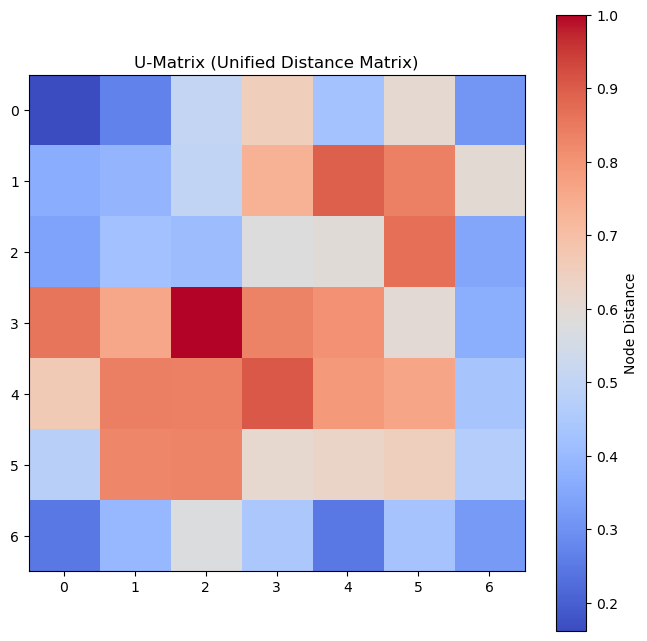

Winning Neurons for each Data Point:
Data Point 1: Target 0, Winning Neuron: (4, 6)
Data Point 2: Target 0, Winning Neuron: (4, 1)
Data Point 3: Target 0, Winning Neuron: (4, 0)
Data Point 4: Target 0, Winning Neuron: (4, 0)
Data Point 5: Target 0, Winning Neuron: (3, 6)
Data Point 6: Target 0, Winning Neuron: (4, 5)
Data Point 7: Target 0, Winning Neuron: (4, 0)
Data Point 8: Target 0, Winning Neuron: (4, 6)
Data Point 9: Target 0, Winning Neuron: (4, 1)
Data Point 10: Target 0, Winning Neuron: (4, 0)
Data Point 11: Target 0, Winning Neuron: (3, 5)
Data Point 12: Target 0, Winning Neuron: (4, 6)
Data Point 13: Target 0, Winning Neuron: (4, 1)
Data Point 14: Target 0, Winning Neuron: (4, 1)
Data Point 15: Target 0, Winning Neuron: (4, 5)
Data Point 16: Target 0, Winning Neuron: (4, 5)
Data Point 17: Target 0, Winning Neuron: (4, 5)
Data Point 18: Target 0, Winning Neuron: (3, 6)
Data Point 19: Target 0, Winning Neuron: (4, 5)
Data Point 20: Target 0, Winning Neuron: (3, 5)
Data Point 2

In [2]:
# Install MiniSom if not already installed
#This model is used to visualize the SOM grid and the wining neurons for each data point in the Iris dataset.
#The SOM grid is a 7 x 7 grid and the model is trained with 100 iterations.
#The U-Matrix is visualized to show the distance between the neurons in the grid.
#The quantization error is calculated to evaluate the model performance.



%pip install minisom
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler


iris = load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names


scaler = MinMaxScaler()
data = scaler.fit_transform(data)


som_width, som_height = 7, 7  
som = MiniSom(som_width, som_height, data.shape[1], sigma=1.0, learning_rate=0.5)
som.random_weights_init(data)


print("Training the SOM...")
som.train_random(data, num_iteration=100)  


print("Visualizing the SOM...")


plt.figure(figsize=(10, 7))
for i, x in enumerate(data):
    winner = som.winner(x)
    plt.text(winner[0] + 0.5, 
             winner[1] + 0.5, 
             str(target[i]), 
             color=plt.cm.rainbow(target[i] / len(target_names)), 
             fontdict={'size': 12})

plt.title("SOM Grid with Winning Neurons")
plt.imshow(som.distance_map().T, cmap='bone_r', alpha=0.7)  
plt.colorbar(label='Distance Map')
plt.grid(which='both', alpha=0.5)
plt.show()


quantization_error = som.quantization_error(data)
print(f"Quantization Error: {quantization_error:.4f}")


u_matrix = som.distance_map()
print("U-Matrix (Distance Map):")
print(u_matrix)


plt.figure(figsize=(8, 8))
plt.imshow(u_matrix.T, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Node Distance')
plt.title("U-Matrix (Unified Distance Matrix)")
plt.show()


print("Winning Neurons for each Data Point:")
for i, x in enumerate(data):
    print(f"Data Point {i+1}: Target {target[i]}, Winning Neuron: {som.winner(x)}")
